In [2]:
import pandas as pd
import numpy as np
from core.match import Match
from core.payoff import PayoffMatrix
from strategies.basic import AlwaysCooperate, AlwaysDefect
from strategies.advanced import TitForTat, Random
from tournaments.roundrobin import RoundRobinTournament

### Assignments

* Implement a simple IPD between two players implementing two given strategies. Study the evolution along the tournament confronting different strategies; study the overall outcome in the different configurations. 


To run a match we need a Payoff Matrix and 2 players. We create an instance of those classes. To handle different strategies with the same logic we use Inheritance and abstract methods.


In [3]:
M = PayoffMatrix()

player1 = AlwaysCooperate(name = 'Pippo')
player2 = AlwaysDefect(name = 'Topolino')

Now we call the orchestrator of the game with all the previously defined objects. The Match class dictates the interactions between strategies and collects data for the analysis

In [4]:
m = Match(player1,player2,M)
results = m.run(rounds=10)

In [5]:
df = pd.DataFrame({
    f"{results['agent_a']} (Move)": results['history_a'], 
    f"{results['agent_b']} (Move)": results['history_b'],
    f"{results['agent_a']} (Payoff)": results['payoffs_a'],
    f"{results['agent_b']} (Payoff)": results['payoffs_b'],
    f"{results['agent_a']} (Cum. Score)": results['cumulative_scores_a'],
    f"{results['agent_b']} (Cum. Score)": results['cumulative_scores_b']
})
display(df.head())

,Pippo (Move),Topolino (Move),Pippo (Payoff),Topolino (Payoff),Pippo (Cum. Score),Topolino (Cum. Score)
0,C,D,0,5,0,5
1,C,D,0,5,0,10
2,C,D,0,5,0,15
3,C,D,0,5,0,20
4,C,D,0,5,0,25


Now let's play an other match with a totally different strategy. 

In [6]:
player3 = TitForTat(name='Pluto')

m2= Match(player2,player3,M)
results2 = m2.run(rounds = 100)
print(f"Risultato Finale:")
print(f"{results2['agent_a']}: {results2['score_a']} punti")
print(f"{results2['agent_b']}: {results2['score_b']} punti")
# Se vuoi vedere il dettaglio round per round:
df2 = pd.DataFrame({
    f"{results2['agent_a']} (Move)": results2['history_a'], 
    f"{results2['agent_b']} (Move)": results2['history_b'],
    f"{results2['agent_a']} (Payoff)": results2['payoffs_a'],
    f"{results2['agent_b']} (Payoff)": results2['payoffs_b'],
    f"{results2['agent_a']} (Cum. Score)": results2['cumulative_scores_a'],
    f"{results2['agent_b']} (Cum. Score)": results2['cumulative_scores_b']
})
display(df2.head())



Risultato Finale:
Topolino: 104 punti
Pluto: 99 punti


,Topolino (Move),Pluto (Move),Topolino (Payoff),Pluto (Payoff),Topolino (Cum. Score),Pluto (Cum. Score)
0,D,C,5,0,5,0
1,D,D,1,1,6,1
2,D,D,1,1,7,2
3,D,D,1,1,8,3
4,D,D,1,1,9,4


In the next example we show why Polymorphism and abstract methods are useful. 
More complex strategies may require parameters to be tooned without (hopefully) throwing exception on the common interface. 
Inheritance allow us to create a specialized constructor to manage the arbitrary complexity of the overwritten strategies compute function. 

In [7]:
player4 = Random(name='Random 0.5') # Default random player with p = 0.5
player5 = Random(p=0.7,name='Random 0.7') # Random player with p = 0.7

m3= Match(player4,player5,M)
results3 = m3.run(rounds = 30)
print(f"Risultato Finale:")
print(f"{results3['agent_a']}: {results3['score_a']} punti")
print(f"{results3['agent_b']}: {results3['score_b']} punti")
# Se vuoi vedere il dettaglio round per round:
df3 = pd.DataFrame({
    f"{results3['agent_a']} (Move)": results3['history_a'], 
    f"{results3['agent_b']} (Move)": results3['history_b'],
    f"{results3['agent_a']} (Payoff)": results3['payoffs_a'],
    f"{results3['agent_b']} (Payoff)": results3['payoffs_b'],
    f"{results3['agent_a']} (Cum. Score)": results3['cumulative_scores_a'],
    f"{results3['agent_b']} (Cum. Score)": results3['cumulative_scores_b']
})
display(df3.head())

Risultato Finale:
Random 0.5: 82 punti
Random 0.7: 67 punti


,Random 0.5 (Move),Random 0.7 (Move),Random 0.5 (Payoff),Random 0.7 (Payoff),Random 0.5 (Cum. Score),Random 0.7 (Cum. Score)
0,D,D,1,1,1,1
1,C,D,0,5,1,6
2,C,C,3,3,4,9
3,D,C,5,0,9,9
4,C,C,3,3,12,12


* Implement a multiple players IPD (MPIPD) where several strategies play against each other in a roud-robin scheme

### Using tournament class to create a Round Robin tournament

First create all the attributes needed: a list of players, the number of round for each match between two players and a Payoff Matrix.
Then use the method play_tournament to dispute al matches.

In [8]:
# Matches Parameters
M = PayoffMatrix()
players = [AlwaysCooperate(), AlwaysDefect(), TitForTat(), Random(name = 'Mainly Nice', p=0.7), Random(name='Mainly Bad', p=0.3)]
N_rounds = 50

tournament = RoundRobinTournament(players, N_rounds, M)
tournament.play_tournament(output = False) # Disabling output for debugging

In [9]:
N_players = tournament.N

# Winninng statistics for each player. Analyze to create leaderboards
N_wins = tournament.N_wins
N_ties = tournament.N_ties
Total_score = tournament.Total_score

# Detailed log for every match
results = tournament.results # List of dictionaries with results for each match
dfs = tournament.dfs         # This is just for convenience. The needed info are already stored in results

# Displaying Leaderboard
data = {
    "Player": [player.name for player in players],
    "Wins": N_wins,
    "Ties": N_ties,
    "Total Score": Total_score
}

result_df = pd.DataFrame(data)
result_df = result_df.sort_values(by="Total Score", ascending=False).reset_index(drop=True)
result_df.index = result_df.index + 1
result_df

#for df in dfs:
#    display(df.head(2))

,Player,Wins,Ties,Total Score
1,AlwaysDefect,4.0,0.0,592.0
2,Mainly Bad,3.0,0.0,501.0
3,Mainly Nice,1.0,1.0,419.0
4,TitForTat,0.0,2.0,408.0
5,AlwaysCooperate,0.0,1.0,288.0


* Iterate what done in the previous task (repeated MPIPD, rMPIPD)  by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration

In [10]:
import numpy as np
from collections import Counter

#The initial population of players (strategies), it may change after each generation iteration 
players = [AlwaysCooperate(), AlwaysDefect(), TitForTat(),
           Random(name='Mainly Nice', p=0.7), Random(name='Mainly Bad', p=0.3)]

M = PayoffMatrix()
N_rounds = 50 # For every match
N_generations = 10 # Number of generations for the evolutionary process
# Tracking population history for visualization
history_population = []

 ### Evolutionary Algorithm
 
 The Algorithm works in this way: at each step (generation) the algorithm calculates the score of all the players (strategies) using 
 the torunament class, calculates the average score achieved in this generation and then compare the score of each strategy 
 with the fitness value (the average score + margin). If a strategy scores more then the fitness it will thrive and will be added +1 of that strategy to the population, if it scores less it will die and if it stays in the margin, it will survive. 

In [11]:
for generation in range(N_generations):
    print(f"--- GENERATION {generation + 1} ---")
    
    # Track current population
    current_names = [p.name for p in players]
    counts = Counter(current_names)
    history_population.append(counts)
    
    tournament = RoundRobinTournament(players, N_rounds, M)
    tournament.play_tournament(output = False)
    
    # Get results from tournament instance
    Total_score = tournament.Total_score
    N_wins = tournament.N_wins
    N_ties = tournament.N_ties
    
    # Relative Fitness Calculations
    avg_score = np.mean(Total_score)
    margin = avg_score * 0.1 # 10% threshold
    print(f"Avg Score: {avg_score:.1f} (Threshold: +/- {margin:.1f})")
    
    # Find Best Strategy 
    best_index = np.argmax(Total_score)
    print(f"Best Strategy: {players[best_index].name} with score {Total_score[best_index]}")
    
    # Evolutionary Step
    next_gen_players = []
    for i in range(len(players)):
        score = Total_score[i]
        name = players[i].name
        status = "Survives"
        
        if score > avg_score + margin:
            # Thrives: +1 offspring (Total 2 copies)
            next_gen_players.extend([players[i], players[i]])
            status = "Thrives (+1)"
        elif score < avg_score - margin:
            # Dies: Removed
            status = "Dies (Removed)"
        else:
            # Survives: Kept as is
            next_gen_players.append(players[i])
            
        print(f"{name}: {score:.0f} -> {status}")
            
    players = next_gen_players
    N = len(players)
    print(f"New Population Size: {N}\n")
    
    if N == 0:
        print("Extinction!")
        break

--- GENERATION 1 ---
Avg Score: 443.2 (Threshold: +/- 44.3)
Best Strategy: AlwaysDefect with score 608.0
AlwaysCooperate: 294 -> Dies (Removed)
AlwaysDefect: 608 -> Thrives (+1)
TitForTat: 411 -> Survives
Mainly Nice: 393 -> Dies (Removed)
Mainly Bad: 510 -> Thrives (+1)
New Population Size: 5

--- GENERATION 2 ---
Avg Score: 293.4 (Threshold: +/- 29.3)
Best Strategy: AlwaysDefect with score 340.0
AlwaysDefect: 340 -> Thrives (+1)
AlwaysDefect: 320 -> Survives
TitForTat: 291 -> Survives
Mainly Bad: 253 -> Dies (Removed)
Mainly Bad: 263 -> Dies (Removed)
New Population Size: 4

--- GENERATION 3 ---
Avg Score: 152.2 (Threshold: +/- 15.2)
Best Strategy: AlwaysDefect with score 154.0
AlwaysDefect: 154 -> Survives
AlwaysDefect: 154 -> Survives
AlwaysDefect: 154 -> Survives
TitForTat: 147 -> Survives
New Population Size: 4

--- GENERATION 4 ---
Avg Score: 152.2 (Threshold: +/- 15.2)
Best Strategy: AlwaysDefect with score 154.0
AlwaysDefect: 154 -> Survives
AlwaysDefect: 154 -> Survives
Alway

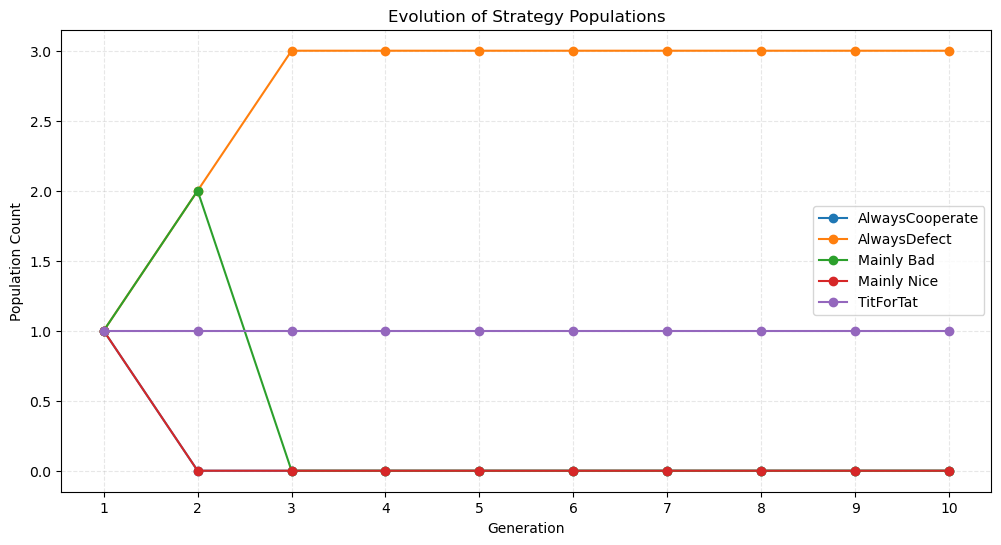

In [12]:
import matplotlib.pyplot as plt

# Prepare data for Line Plot
all_strategies = set()
for counts in history_population:
    all_strategies.update(counts.keys())
sorted_strategies = sorted(list(all_strategies))

x = range(1, len(history_population) + 1)

plt.figure(figsize=(12, 6))

for strategy in sorted_strategies:
    y_strategy = []
    for counts in history_population:
        y_strategy.append(counts.get(strategy, 0))
    # Plotting each strategy as a line
    plt.plot(x, y_strategy, label=strategy, marker='o')

plt.title('Evolution of Strategy Populations')
plt.xlabel('Generation')
plt.ylabel('Population Count')
plt.xticks(np.arange(1, N_generations + 1, max(1, int(N_generations / 10))))
plt.legend()
plt.grid(alpha=0.3,linestyle='--')
plt.show()

* (*difficult*) Implement a rMPIPD where strategies are allowed to mutate. The goal is to simulate the effect of genetic mutations and the effect of natura selection. A parameter (gene) should encode the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.  


## Evolutionary Simulation of Cooperation

This script implements an evolutionary simulation of the Iterated Prisoner’s Dilemma to study how cooperation emerges and changes over time.

The population is composed of agents using the **MutantRandom** strategy. Each agent has a gene `p`, representing the probability of cooperating, and a mutation rate `gamma` that introduces random variation across generations.

At every generation, the simulation follows four main steps:

1. **Tournament**  
   Agents are randomly paired and play repeated matches. Their accumulated payoff defines their fitness.

2. **Statistics Collection**  
   The average cooperation gene (`p`) across the population is recorded to track the evolutionary trend.

3. **Natural Selection**  
   Agents reproduce with probability proportional to their score. Strategies with higher fitness are therefore more likely to propagate.

4. **Mutation**  
   Offspring may undergo small genetic changes, ensuring diversity and preventing premature convergence.

By repeating this process for multiple generations, the system models a simple evolutionary dynamic in which cooperative behavior can either spread or disappear depending on its adaptive advantage.

Finally, the simulation plots the average cooperation level over time, providing a clear visualization of the evolutionary trajectory of the population.

Inizio simulazione per 30 generazioni con 1000 agenti...
Gen 0: Avg Cooperation Gene (p) = 0.501
Gen 10: Avg Cooperation Gene (p) = 0.246
Gen 20: Avg Cooperation Gene (p) = 0.172
Simulazione terminata.


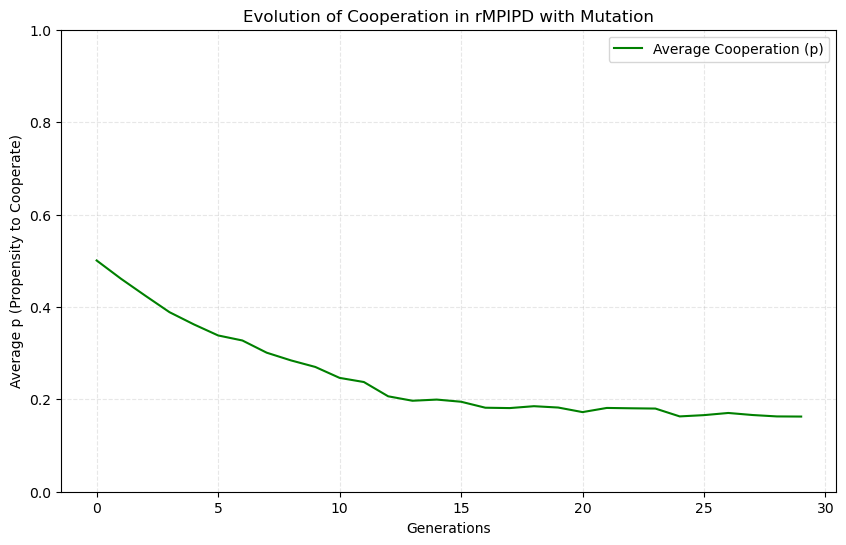

In [14]:
from tournaments.genetic import EvolutionarySimulation

N_PRISONERS = 1000
GENERATIONS = 30
MATCH_ROUNDS = 500

payoff_matrix = PayoffMatrix(T=5, R=3, P=1, S=0)

# Istanzia e avvia la simulazione
sim = EvolutionarySimulation(
    n_agents=N_PRISONERS, 
    rounds_per_match=MATCH_ROUNDS, 
    payoff_matrix=payoff_matrix
)

sim.evolve(generations=GENERATIONS)
sim.plot_results()